# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [4]:
#Your code here

In [5]:
# __SOLUTION__ 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [6]:
# __SOLUTION__ 
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [7]:
# __SOLUTION__ 
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [8]:
# __SOLUTION__ 
df.columns = [col_formatting(col) for col in df.columns]

In [9]:
# __SOLUTION__ 
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [10]:
# __SOLUTION__ 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [11]:
# __SOLUTION__ 
#Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [12]:
# __SOLUTION__ 
train, test = train_test_split(df)

In [13]:
# __SOLUTION__ 
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
10674,-0.337985,36.5878,-0.175090,0.041796,-0.252954,1.083511,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7290,-0.345204,24.3878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3673,-0.588223,12.9120,-0.398512,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7270,0.270766,109.7878,-0.258873,-0.655279,-0.874757,-0.847850,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8341,-0.153916,73.1878,-0.063378,-0.655279,-2.118362,-1.491638,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# __SOLUTION__ 
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
3445,-0.437840,25.3980,-0.398512,0.216064,-1.082024,-0.365010,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10152,-0.151510,43.4971,-0.370585,0.564601,-3.776502,-1.491638,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5356,0.063839,92.7078,-0.286801,-0.306741,-0.460222,0.278777,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3692,0.262345,86.3520,-0.258873,0.390333,-0.874757,-0.365010,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9622,-0.571380,31.9429,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
# __SOLUTION__ 
#Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     534.0
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:21   Log-Likelihood:                -40345.
No. Observations:                8152   AIC:                         8.088e+04
Df Residuals:                    8057   BIC:                         8.155e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.4432      1.988     31.920      0.000      59.547      67.339
piece_count                                         77.5286      0.882     87.865      0.000      75.799      79.258
num_reviews                                          6.8938      0.669     10.300      0.000       5.582       8.206
play_star_rating                                     5.1531      0.608      8.475      0.000       3.961       6.345
star_rating                                         -1.3370      0.690     -1.937      0.053      -2.690       0.016
val_star_rating                                     -7.9233      0.614    -12.901      0.000      -9.127      -6.719
ages_10plus                                        124.5101      6.446     19.315      0.000     111.874     137.147
ages_10_14                                         -21.8760      9.030     -2.422      0.015     -39.578      -4.174
ages_10_16                                         -12.5289      4.032     -3.108      0.002     -20.432      -4.626
ages_10_21                                          56.0437      7.155      7.833      0.000      42.019      70.069
ages_11_16                                         -21.9216      5.976     -3.668      0.000     -33.635     -10.208
ages_12plus                                         68.9323      5.478     12.584      0.000      58.195      79.670
ages_12_16                                         -70.1946      6.972    -10.068      0.000     -83.862     -56.527
ages_14plus                                         24.5772      4.263      5.765      0.000      16.221      32.933
ages_16plus                                         20.9553      6.079      3.447      0.001       9.039      32.872
ages_1half_3                                        -8.3407      2.364     -3.528      0.000     -12.975      -3.706
ages_1half_5                                        -4.2354      2.807     -1.509      0.131      -9.738       1.268
ages_2_5                                            15.9058      1.637      9.718      0.000      12.698      19.114
ages_4plus                                         -20.4842      5.887     -3.479      0.001     -32.025      -8.944
ages_4_7                                            -5.3233      3.563     -1.494      0.135     -12.307       1.660
ages_4_99                                           -1.0041      3.407     -0.295      0.768      -7.683       5.675
ages_5plus                                          -8.5931      3.098     -2.774      0.006     -14.666      -2.521
ages_5_12                                          -33.0921      3.183    -10.396      0.000     -39.332     -26.852
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [16]:
#Your code here

In [17]:
# __SOLUTION__ 
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 71
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.4432,1.988,31.920,0.000,59.547,67.339
piece_count,77.5286,0.882,87.865,0.000,75.799,79.258
num_reviews,6.8938,0.669,10.300,0.000,5.582,8.206
play_star_rating,5.1531,0.608,8.475,0.000,3.961,6.345
star_rating,-1.3370,0.690,-1.937,0.053,-2.690,0.016


In [18]:
# __SOLUTION__ 
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     717.2
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:21   Log-Likelihood:                -40355.
No. Observations:                8152   AIC:                         8.085e+04
Df Residuals:                    8081   BIC:                         8.135e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.3626      1.510     43.299      0.000      62.404      68.322
piece_count                                         77.4971      0.867     89.398      0.000      75.798      79.196
num_reviews                                          7.0283      0.663     10.598      0.000       5.728       8.328
play_star_rating                                     4.7406      0.514      9.232      0.000       3.734       5.747
val_star_rating                                     -8.6035      0.483    -17.818      0.000      -9.550      -7.657
ages_10plus                                        129.7044      7.203     18.007      0.000     115.584     143.824
ages_10_14                                         -17.8290      9.340     -1.909      0.056     -36.137       0.479
ages_10_16                                          -9.2960      3.737     -2.488      0.013     -16.621      -1.971
ages_10_21                                          61.3902      7.741      7.930      0.000      46.216      76.565
ages_11_16                                         -18.4464      5.768     -3.198      0.001     -29.754      -7.139
ages_12plus                                         72.9934      6.360     11.478      0.000      60.527      85.460
ages_12_16                                         -66.4780      7.266     -9.150      0.000     -80.720     -52.235
ages_14plus                                         28.2627      4.849      5.828      0.000      18.757      37.768
ages_16plus                                         23.8282      6.758      3.526      0.000      10.580      37.076
ages_1half_3                                        -1.6819      3.055     -0.551      0.582      -7.670       4.306
ages_2_5                                            21.9932      1.943     11.318      0.000      18.184      25.802
ages_4plus                                         -21.6331      8.988     -2.407      0.016     -39.252      -4.014
ages_5plus                                          -7.7951      3.018     -2.583      0.010     -13.711      -1.880
ages_5_12                                          -28.0697      2.610    -10.754      0.000     -33.187     -22.953
ages_6plus                                         -22.0991      5.475     -4.036      0.000     -32.832     -11.366
ages_6_12                                          -15.7449      1.822     -8.641      0.000     -19.317     -12.173
ages_7_12                                          -14.7517      2.161     -6.826      0.000     -18.988     -10.515
ages_7_14                                          -11.3411      1.921     -5.903      0.000     -15.107      -7.575
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [19]:
#Your code here

In [20]:
# __SOLUTION__ 
#Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

72 59
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.3626,1.510,43.299,0.0,62.404,68.322
piece_count,77.4971,0.867,89.398,0.0,75.798,79.196
num_reviews,7.0283,0.663,10.598,0.0,5.728,8.328
play_star_rating,4.7406,0.514,9.232,0.0,3.734,5.747
val_star_rating,-8.6035,0.483,-17.818,0.0,-9.550,-7.657


In [21]:
# __SOLUTION__ 
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     864.2
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:22   Log-Likelihood:                -40366.
No. Observations:                8152   AIC:                         8.085e+04
Df Residuals:                    8093   BIC:                         8.126e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.8481      1.211     54.365      0.000      63.474      68.222
piece_count                                         77.2538      0.839     92.066      0.000      75.609      78.899
num_reviews                                          6.9137      0.653     10.583      0.000       5.633       8.194
play_star_rating                                     4.8698      0.511      9.537      0.000       3.869       5.871
val_star_rating                                     -8.6307      0.482    -17.898      0.000      -9.576      -7.685
ages_10plus                                        132.4402      7.121     18.598      0.000     118.481     146.400
ages_10_16                                          -6.5311      3.500     -1.866      0.062     -13.392       0.330
ages_10_21                                          62.6789      7.718      8.121      0.000      47.550      77.808
ages_11_16                                         -15.7742      5.581     -2.826      0.005     -26.714      -4.834
ages_12plus                                         76.8134      6.125     12.541      0.000      64.807      88.820
ages_12_16                                         -62.9609      7.035     -8.950      0.000     -76.751     -49.170
ages_14plus                                         34.3025      4.215      8.137      0.000      26.039      42.566
ages_16plus                                         29.1337      6.279      4.640      0.000      16.826      41.442
ages_2_5                                            23.1224      1.804     12.818      0.000      19.586      26.659
ages_4plus                                         -20.9592      8.976     -2.335      0.020     -38.554      -3.364
ages_5plus                                          -7.1985      2.999     -2.400      0.016     -13.078      -1.319
ages_5_12                                          -26.7057      2.495    -10.704      0.000     -31.596     -21.815
ages_6plus                                         -20.4189      5.420     -3.767      0.000     -31.044      -9.794
ages_6_12                                          -13.9555      1.555     -8.975      0.000     -17.004     -10.907
ages_7_12                                          -13.0428      1.936     -6.739      0.000     -16.837      -9.249
ages_7_14                                           -9.6458      1.688     -5.714      0.000     -12.955      -6.337
ages_8plus                                          21.3816      4.940      4.328      0.000      11.697      31.066
ages_8_12                                          -12.5387      2.517     -4.982      0.000     -17.472      -7.605
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [22]:
#Your code here

In [23]:
# __SOLUTION__ 
#Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/alex/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.440990382267404),
 ('num_reviews', 2.8029727441694536),
 ('play_star_rating', 1.8068700944259386),
 ('val_star_rating', 1.6310767056364888),
 ('ages_10plus', 17.658674871005292),
 ('ages_10_16', 1.1180147491092753),
 ('ages_10_21', 7.175088659528819),
 ('ages_11_16', 1.1296889301018416),
 ('ages_12plus', 6.954989926022552),
 ('ages_12_16', 1.1659543079993575),
 ('ages_14plus', 1.7733958662983669),
 ('ages_16plus', 8.823880215652627),
 ('ages_2_5', 1.166120235087852),
 ('ages_4plus', 1.1931577826353863),
 ('ages_5plus', inf),
 ('ages_5_12', 3.177994359450526),
 ('ages_6plus', 2.657357778210103),
 ('ages_6_12', 1.7332762981119656),
 ('ages_7_12', 1.385624040361591),
 ('ages_7_14', 1.7927876274949575),
 ('ages_8plus', 3.3294194279920273),
 ('ages_8_12', 1.21352147201632),
 ('ages_8_14', 1.5971124729037305),
 ('ages_9plus', 1.5473627655033815),
 ('ages_9_12', 1.0154089937428885),
 ('theme_name_Architecture', 5.840760659458497),
 ('theme_name_BOOST', 1.0601451275780753),


## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [24]:
#Your code here

In [25]:
# __SOLUTION__ 
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

59 50


In [26]:
# __SOLUTION__ 
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     880.1
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:25   Log-Likelihood:                -40822.
No. Observations:                8152   AIC:                         8.175e+04
Df Residuals:                    8101   BIC:                         8.210e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           70.7479      1.011     69.948      0.000      68.765      72.731
piece_count                                         77.9800      0.684    114.075      0.000      76.640      79.320
num_reviews                                          4.8202      0.631      7.644      0.000       3.584       6.056
play_star_rating                                     6.4976      0.479     13.562      0.000       5.558       7.437
val_star_rating                                    -10.4215      0.483    -21.589      0.000     -11.368      -9.475
ages_10_16                                         -13.2244      3.560     -3.714      0.000     -20.203      -6.245
ages_11_16                                         -24.4561      5.654     -4.326      0.000     -35.539     -13.374
ages_12_16                                         -71.9101      7.090    -10.142      0.000     -85.809     -58.012
ages_14plus                                         17.5853      3.799      4.629      0.000      10.139      25.032
ages_2_5                                            17.9913      1.777     10.126      0.000      14.508      21.474
ages_4plus                                          -9.3228      9.406     -0.991      0.322     -27.762       9.116
ages_5_12                                          -32.5127      2.561    -12.693      0.000     -37.534     -27.492
ages_6plus                                         -27.0108      5.692     -4.745      0.000     -38.168     -15.853
ages_6_12                                          -20.3276      1.528    -13.307      0.000     -23.322     -17.333
ages_7_12                                          -18.4086      1.956     -9.412      0.000     -22.243     -14.574
ages_7_14                                          -15.3158      1.692     -9.051      0.000     -18.633     -11.999
ages_8plus                                           0.1871      4.411      0.042      0.966      -8.460       8.834
ages_8_12                                          -17.6314      2.551     -6.911      0.000     -22.632     -12.631
ages_8_14                                          -13.6584      1.679     -8.133      0.000     -16.951     -10.366
ages_9plus                                          23.1491     10.093      2.294      0.022       3.364      42.934
ages_9_12                                          -29.5471      6.323     -4.673      0.000     -41.942     -17.152
theme_name_BOOST                                    89.9271      8.853     10.158      0.000      72.573     107.281
theme_name_Blues_Helicopter_Pursuit                 22.2924      8.530      2.614      0.009       5.572      39.013
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [27]:
# Your code here

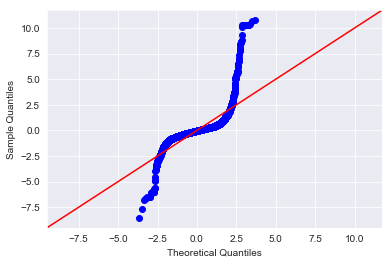

In [28]:
# __SOLUTION__ 
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [29]:
#Your code here

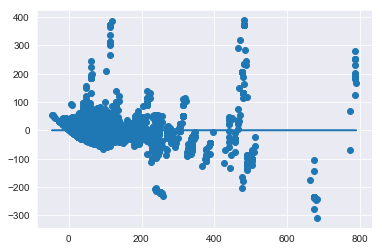

In [30]:
# __SOLUTION__ 
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [31]:
#Your code here

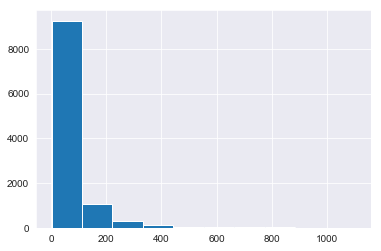

In [32]:
# __SOLUTION__ 
df.list_price.hist()

In [33]:
# __SOLUTION__ 
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [ ]:
# __SOLUTION__
# Rerunning The Model

In [34]:
# __SOLUTION__ 
orig_tot = len(df)
df = df[df.list_price < 450] #Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     474.2
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:27   Log-Likelihood:                -5094.2
No. Observations:                8067   AIC:                         1.029e+04
Df Residuals:                    8016   BIC:                         1.065e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4583      0.013    267.513      0.000       3.433       3.484
piece_count                                          0.5871      0.010     58.051      0.000       0.567       0.607
num_reviews                                          0.0011      0.008      0.140      0.889      -0.015       0.017
play_star_rating                                     0.1233      0.006     20.273      0.000       0.111       0.135
val_star_rating                                     -0.1638      0.006    -26.568      0.000      -0.176      -0.152
ages_10_16                                           0.4897      0.046     10.570      0.000       0.399       0.581
ages_11_16                                           0.2740      0.066      4.161      0.000       0.145       0.403
ages_12_16                                          -0.1244      0.089     -1.395      0.163      -0.299       0.050
ages_14plus                                          0.3096      0.050      6.183      0.000       0.211       0.408
ages_2_5                                             0.4494      0.022     20.059      0.000       0.406       0.493
ages_4plus                                          -1.3433      0.121    -11.078      0.000      -1.581      -1.106
ages_5_12                                           -0.8117      0.032    -24.980      0.000      -0.875      -0.748
ages_6plus                                          -1.0064      0.072    -13.934      0.000      -1.148      -0.865
ages_6_12                                           -0.2457      0.019    -12.668      0.000      -0.284      -0.208
ages_7_12                                            0.0242      0.024      0.990      0.322      -0.024       0.072
ages_7_14                                           -0.1029      0.021     -4.865      0.000      -0.144      -0.061
ages_8plus                                           0.5083      0.055      9.249      0.000       0.401       0.616
ages_8_12                                            0.2124      0.032      6.703      0.000       0.150       0.274
ages_8_14                                            0.1946      0.021      9.215      0.000       0.153       0.236
ages_9plus                                           0.2220      0.131      1.698      0.090      -0.034       0.478
ages_9_12                                            0.3156      0.078      4.022      0.000       0.162       0.469
theme_name_BOOST                                     1.0529      0.121      8.674      0.000       0.815       1.291
theme_name_Blues_Helicopter_Pursuit                  0.7209      0.116      6.192      0.000       0.493       0.949
theme_name_Carnotaurus_Gyrosphere_Escape 

In [ ]:
# __SOLUTION__
# Check Normality Assumption

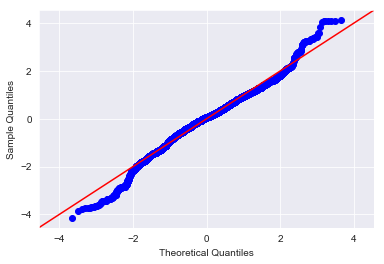

In [35]:
# __SOLUTION__ 
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# __SOLUTION__ 
# Check the Homoscedasticity Assumption

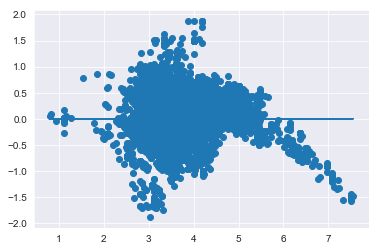

In [36]:
# __SOLUTION__ 
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# __SOLUTION__
# Reexamining the Transformed Distribution

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


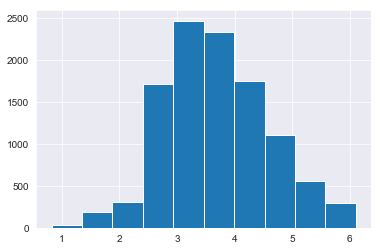

In [37]:
# __SOLUTION__
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [38]:
# __SOLUTION__ 
df = df[df.list_price <= 6]
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     464.6
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:29   Log-Likelihood:                -4920.4
No. Observations:                8027   AIC:                             9943.
Df Residuals:                    7976   BIC:                         1.030e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4846      0.013    270.379      0.000       3.459       3.510
piece_count                                          0.6595      0.011     59.013      0.000       0.638       0.681
num_reviews                                          0.0113      0.009      1.313      0.189      -0.006       0.028
play_star_rating                                     0.1104      0.006     18.426      0.000       0.099       0.122
val_star_rating                                     -0.1607      0.006    -26.560      0.000      -0.173      -0.149
ages_10_16                                           0.4264      0.045      9.414      0.000       0.338       0.515
ages_11_16                                           0.0832      0.069      1.204      0.229      -0.052       0.219
ages_12_16                                          -0.2908      0.088     -3.292      0.001      -0.464      -0.118
ages_14plus                                          0.1910      0.051      3.750      0.000       0.091       0.291
ages_2_5                                             0.4440      0.022     20.229      0.000       0.401       0.487
ages_4plus                                          -1.4286      0.120    -11.885      0.000      -1.664      -1.193
ages_5_12                                           -0.7855      0.032    -24.801      0.000      -0.848      -0.723
ages_6plus                                          -1.0112      0.080    -12.713      0.000      -1.167      -0.855
ages_6_12                                           -0.2407      0.019    -12.714      0.000      -0.278      -0.204
ages_7_12                                            0.0322      0.024      1.314      0.189      -0.016       0.080
ages_7_14                                           -0.0872      0.021     -4.150      0.000      -0.128      -0.046
ages_8plus                                           0.5155      0.055      9.432      0.000       0.408       0.623
ages_8_12                                            0.1679      0.032      5.295      0.000       0.106       0.230
ages_8_14                                            0.1928      0.021      9.228      0.000       0.152       0.234
ages_9plus                                           0.2157      0.116      1.858      0.063      -0.012       0.443
ages_9_12                                            0.2951      0.079      3.720      0.000       0.140       0.451
theme_name_BOOST                                     0.9771      0.133      7.366      0.000       0.717       1.237
theme_name_Blues_Helicopter_Pursuit                  0.7161      0.108      6.623      0.000       0.504       0.928
theme_name_Carnotaurus_Gyrosphere_Escape 

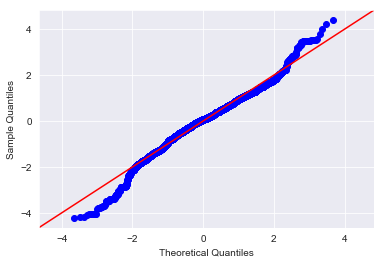

In [39]:
# __SOLUTION__ 
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# __SOLUTION__ 
# Check the Homoscedasticity Assumption

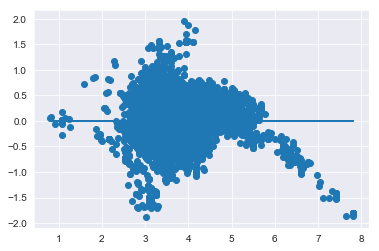

In [40]:
# __SOLUTION__ 
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# __SOLUTION__
# An Alternative Approach: Building a Model From the Ground Up

In [41]:
# __SOLUTION__ 
x_cols = ['piece_count', 'country_US']

In [42]:
# __SOLUTION__ 
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     4352.
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:25:30   Log-Likelihood:                -7447.2
No. Observations:                8027   AIC:                         1.490e+04
Df Residuals:                    8024   BIC:                         1.492e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7396      0.007    527.127      0.000       3.726       3.753
piece_count     0.7855      0.008     92.477      0.000       0.769       0.802
country_US     -0.2644      0.027     -9.709      0.000      -0.318      -0.211
==============================================================================
Omnibus:                      509.127   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.787
Skew:                          -0.524   Prob(JB):                    2.34e-171
Kurtosis:                       4.118   Cond. No.                         4.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# __SOLUTION__
# Checking Assumptions for Simplified Model

In [ ]:
# __SOLUTION__
# Check Normality Assumption

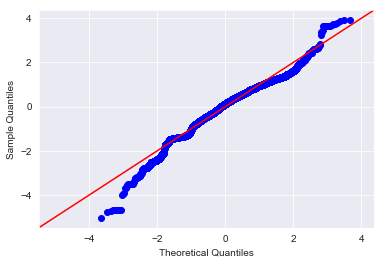

In [43]:
# __SOLUTION__
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# __SOLUTION__
# Check Homoscedasticity Assumption

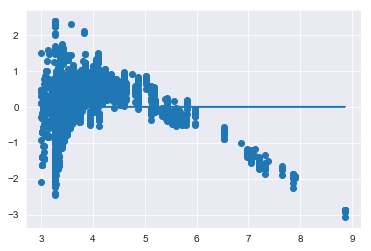

In [44]:
# __SOLUTION__ 
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 